In [4]:
import numpy as np
import matplotlib.pyplot as plt

from diffusion_map import DiffusionMap
from datafold.utils.plot import plot_pairwise_eigenvector
from dataset import Dataset

%load_ext autoreload
%autoreload 2

In [6]:
def plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, time):
    """
    Plot different graphs with respect to selected part.
    """
    print(f"{sample} Largest eigenvalues with respect this dataset: \n {evals}")
    idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

    if part == 1 or part == 2:
        plot_pairwise_eigenvector(
            eigenvectors=evecs[idx_plot, :],
            n=1,
            fig_params=dict(figsize=[15, 7]),
            scatter_params=dict(cmap=plt.cm.Spectral, c=time[idx_plot]),
        ) 
    elif part == 3:
        pass
    
    plt.show()


## Initializations:

In [ ]:
nr_samples = 5000        # Number of samples
nr_samples_plot = 1000   # Number of samples to plot
sample = 10              # L+1 largest eigenfunctions
radius = 5               # Radius around a point for distance computation

### Part 1: Swiss-roll Data set embedding using our implementations

In [10]:
part = 1

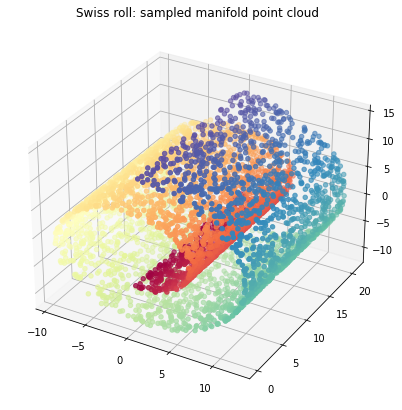

In [11]:
dataset = Dataset(nr_samples, nr_samples_plot)
positions, positions_color = dataset.generate_swiss_roll()
dataset.plot_swiss_roll(positions, positions_color)


10 Largest eigenvalues with respect this dataset: 
 [1.         0.99968981 0.9987644  0.99722406 0.99507816 0.99487431
 0.99453972 0.99361314 0.99241532 0.99208781 0.99000295]


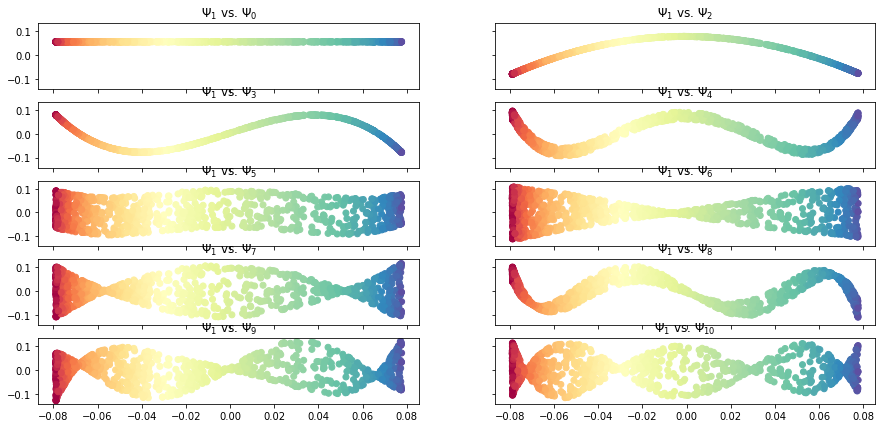

In [9]:
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions(positions, sample, radius)

# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)

## Part 2: Swiss-roll Data set embedding using DataFold Library

In [13]:
part = 2

10 Largest eigenvalues with respect this dataset: 
 [1.         0.9996519  0.99857977 0.99678057 0.99441087 0.99425185
 0.99357288 0.99266504 0.99110789 0.99086471]


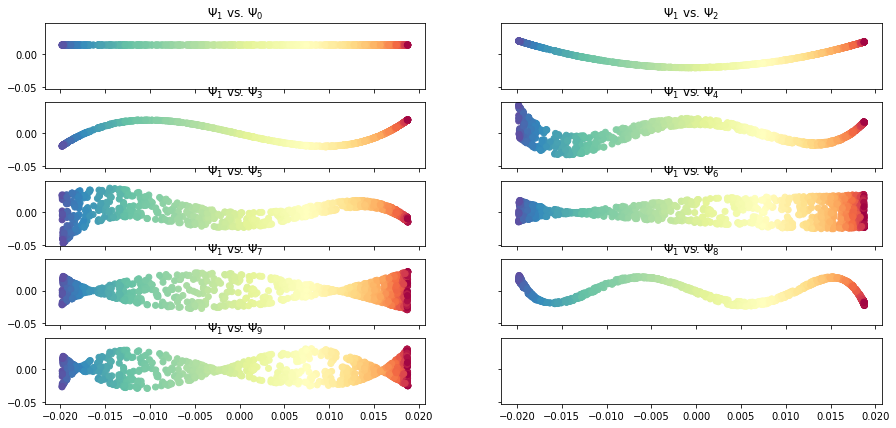

In [14]:
dataset = Dataset(nr_samples, nr_samples_plot)
positions, positions_color = dataset.generate_swiss_roll()
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions_datafold(positions, sample)

# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)